<a href="https://colab.research.google.com/github/pjjongho/Colab_AD/blob/main/Current%20Anomaly%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 28**  
**┗ 전력 소비량 저하 이상 탐지**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「가설 수립 및 검증」
* 🥇Session 3 - 「이상 탐지 모델링」

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** ⚡

```
A사는 태양열 전력 발전을 통해서 전력을 생산하고 유틸리티에 활용하고 있다. 전력 생산량보다 소비량이 많아지게 되면 기존에 저장되어  
있는 전력 이외에 추가 전력이 필요하므로, 전력을 구매해야 한다. 구매하는 전력의 가격은 조기에 살 수록 더 유리하다. 따라서 전력 소비량이  
증가하는 사전 시점을 탐지하고, 조기에 전력을 구매하여 운용 비용을 절감하고자 한다.
```  

> **데이터 살펴보기**

* 2017.1.1 ~ 2017.12.30일까지 10분 단위로 기상 데이터 및 전력 발산량과 각 위치(Zone1~3)의 소비량이 기록되어 있다.
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|Date|날짜|
|Temperature|온도|
|Humidity|습도|
|Wind Speed|풍속|
|general diffuse flows|전력 발산량(일반)|
|diffuse flows|전력 발산량|
|Zone 1 Power Consumption|Zone1 소비량|
|Zone 2 Power Consumption|Zone2 소비량|
|Zone 3 Power Consumption|Zone3 소비량|

In [ ]:
# ▶ pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv('chapter28_powercomp.csv')
df = df.sort_values(by=['DateTime'])
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
36199,9/9/2017 9:10,22.790,82.6,0.292,251.100,103.400,30628.67257,18636.17464,13861.65475
36200,9/9/2017 9:20,22.870,81.2,0.276,332.900,90.900,31291.32743,18778.37838,13955.79162
36201,9/9/2017 9:30,23.290,80.6,0.283,329.200,75.600,31750.08850,19279.83368,14297.03779
36202,9/9/2017 9:40,23.600,78.4,0.277,484.200,74.700,32419.11504,19511.85031,14779.48927


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 전력 구매 비용 증가
▶ 전력 운용 예산 부족
```  

> **기대효과**

```
▶ 전력 상승 조기 감지를 통한 전력 구매 비용 절감
```

> **해결방안**

```
▶ 전력 상승 조기 감지 이상 탐지 모델 개발 및 운영
▶ Session 1 🥉
 - 데이터 전처리 및 EDA
▶ Session 2 🥈
 - 가설 수립 및 검증
▶ Session 3 🥇
 - 이상 탐지 모델링 수행
```

> **성과측정**  

```
▶ 전력 이상 감지 모델 운용 전/후 전력 구매 비용 비교
▶ 전력 이상 감지 모델 운용 전/후 운용 예산 사용 효율 비교
```

> **현업적용**  

```
▶ 일기예보 기상 데이터 실시간 수집 체계 구축  
▶ 소비량 센서 Data 실시간 Server 전송 체계 구축
▶ 일정 주기 간격(window)으로 데이터 인입 및 모델을 통해 전력 상승 포인트 탐지
▶ 생성된 데이터에 따라 전력 구매 진행
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → replace(), to_datetime(), astype(str)
▶ session 2 → sns.distplot(), plt.axvline(), value_counts(), sns.heatmap(), sns.pairplot()
▶ session 3 → str.contains, np.log(), np.where
```

## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# ▶ Data 형태 확인
# ▶ 52416 row, 9 col로 구성됨
print('df', df.shape)

df (52416, 9)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52416 entries, 0 to 36203
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB


In [ ]:
# ▶ Date type 변경
import datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values(by=['DateTime'])
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [ ]:
# ▶ Outlier 확인, 음수값 확인
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
# ▶ 전처리 완료
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### · 전력량 Data 탐색
---
* Data Trend 분석

In [ ]:
# ▶ 2017년 1년치에 Data 확인
df['DateTime'].min(), df['DateTime'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 23:50:00'))

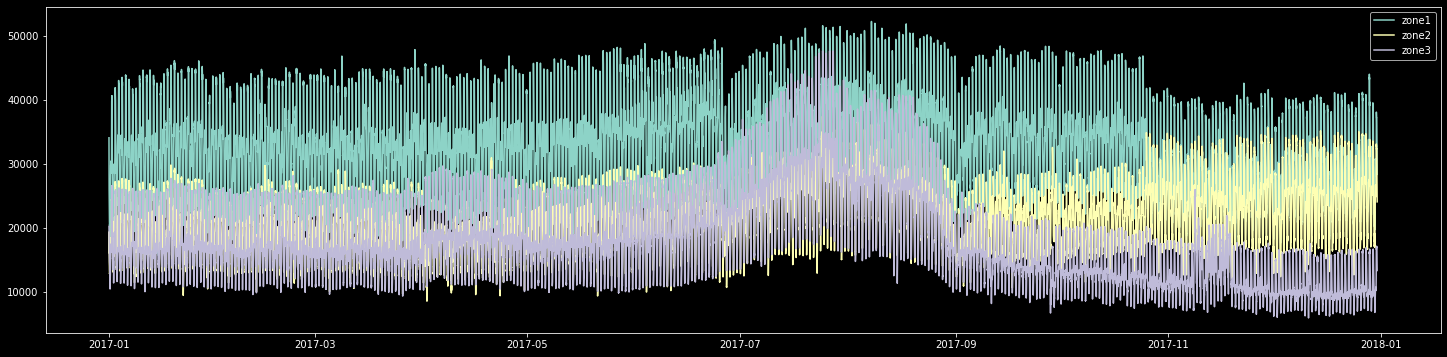

In [ ]:
# ▶ Zone1, 2, 3 전력 소비량
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['DateTime'], df['Zone 1 Power Consumption'], label='zone1')
plt.plot(df['DateTime'], df['Zone 2  Power Consumption'], label='zone2')
plt.plot(df['DateTime'], df['Zone 3  Power Consumption'], label='zone3')
plt.legend()
plt.gcf().set_size_inches(25, 6)

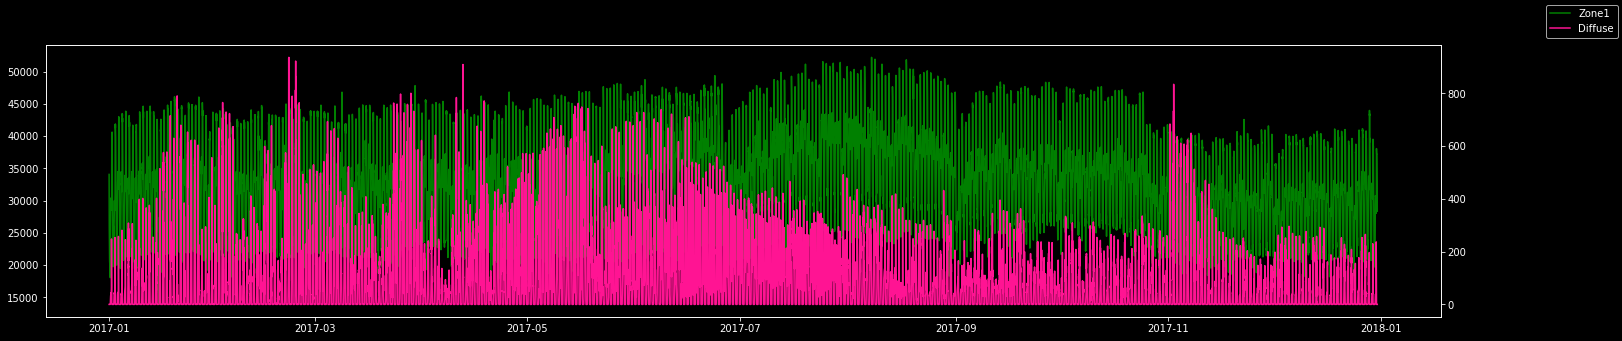

In [ ]:
# ▶ Zone1 소비량과 전력 발산량(diffuse flows) 비교
# ▶ 전력 발산량(diffuse flows)가 낮아질 때 전력소비량이 증가하는 경향이 보임
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['diffuse flows'], color='deeppink', label='Diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()

In [ ]:
df['Zone 2  Power Consumption']

0        16128.87538
1        19375.07599
2        19006.68693
3        18361.09422
4        17872.34043
            ...     
52411    26857.31820
52412    26124.57809
52413    25277.69254
52414    24692.23688
52415    24055.23167
Name: Zone 2  Power Consumption, Length: 52416, dtype: float64

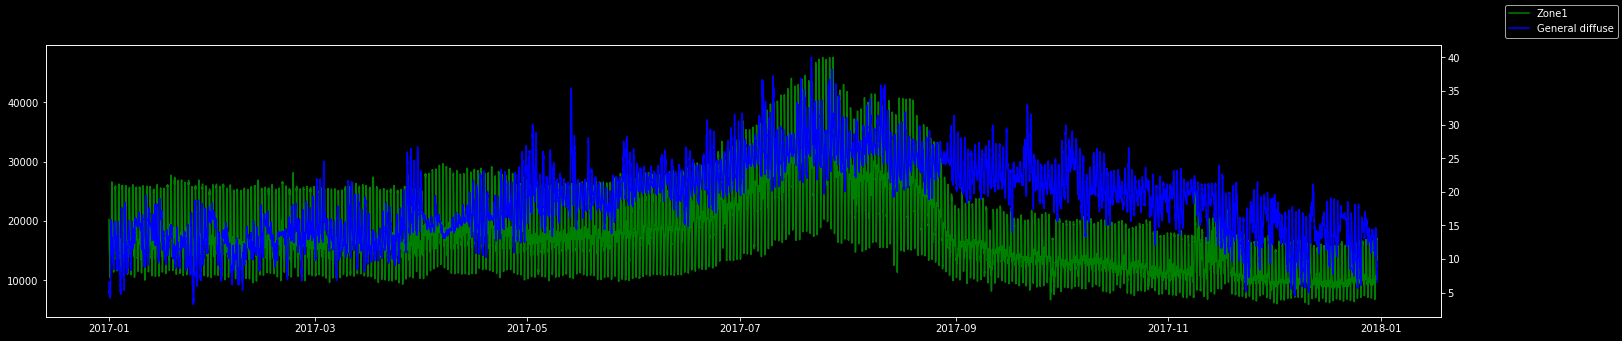

In [ ]:
# ▶ Zone1 소비량과 전력 발산량 일반(general diffuse flows) 비교
# ▶ 전력 발산량 일반(general diffuse flows)과는 큰 상관관계는 없어 보임
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 3  Power Consumption'], color='green', label='Zone1')

ax2 = ax1.twinx()
# ax2.plot(df['DateTime'], df['general diffuse flows'], color='blue', label='General diffuse')
ax2.plot(df['DateTime'], df['Temperature'], color='blue', label='General diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()

### · Peak 시간대 탐색
---
* 전력소비량 Peak 월 탐색
* 전력소비량 Peark 시간대 탐색

In [ ]:
# ▶ 시간 데이터 활용 Month 생성
df['month']=df['DateTime'].dt.month
df.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


In [ ]:
# ▶ COL명 변경
df.columns=['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3', 'month']

# ▶ 순서변경
df=df[['DateTime',  'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3']]

In [ ]:
df.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
# ▶ zone1은 8월이 가장 평균 소비량이 많음
df['zone1'].groupby(df['month']).mean().sort_values(ascending=False)

month
8     36435.189574
7     35831.553603
6     34605.540839
9     33396.681416
10    32827.660055
5     32396.009166
4     31169.768210
3     31155.165408
1     31032.493535
2     30985.753632
12    29024.168427
11    29002.106838
Name: zone1, dtype: float64

In [ ]:
# ▶ zone2은 8월이 가장 평균 소비량이 많음
df['zone2'].groupby(df['month']).mean().sort_values(ascending=False)

month
8     24656.216575
7     24147.886893
12    23681.852818
11    23240.464015
10    21468.993441
6     20670.928621
9     20180.432259
5     19977.287859
1     19394.444717
2     18787.793096
3     18457.937484
4     17633.966395
Name: zone2, dtype: float64

In [ ]:
# ▶ zone3은 7월이 가장 평균 소비량이 많음
df['zone3'].groupby(df['month']).mean().sort_values(ascending=False)

month
7     28194.111216
8     24648.894732
6     20430.941538
4     18593.167677
1     17746.095349
5     17621.100953
2     17335.002154
3     16947.686004
9     14922.798774
10    13264.095173
11    12862.496653
12    11044.805922
Name: zone3, dtype: float64

In [ ]:
# ▶ 시간 데이터 활용 hour 생성
df['hour']=df['DateTime'].dt.hour

In [ ]:
# ▶ zone1은 20h가 가장 평균 소비량이 많음
df['zone1'].groupby(df['hour']).mean().sort_values(ascending=False)

hour
20    43822.590575
19    42795.919144
21    42216.478542
22    39068.635850
18    38846.130578
13    35112.272501
12    35052.519771
17    34924.975330
14    34643.598565
11    34487.628942
23    34409.579507
15    33911.996991
16    33385.204774
10    32566.456638
0     30217.235372
9     29725.358515
1     27565.533030
8     26583.262396
2     26292.688917
3     25338.122851
4     24633.576717
7     24038.353352
5     23437.577276
6     23203.597394
Name: zone1, dtype: float64

In [ ]:
# ▶ zone2은 20h가 가장 평균 소비량이 많음
df['zone2'].groupby(df['hour']).mean().sort_values(ascending=False)

hour
20    28186.910385
19    27723.744582
21    27228.712785
18    25443.902236
22    25284.942543
17    23032.424137
13    22958.487220
12    22876.880705
14    22855.352630
15    22508.399601
23    22443.673671
11    22442.538105
16    22014.478496
10    21356.674572
0     19692.073550
9     19640.721504
1     17765.078949
8     17529.678454
2     16730.156092
3     16052.585288
7     15719.115067
4     15624.081077
5     14974.907723
6     14934.698604
Name: zone2, dtype: float64

In [ ]:
# ▶ zone3은 20h가 가장 평균 소비량이 많음
df['zone3'].groupby(df['hour']).mean().sort_values(ascending=False)

hour
20    26027.609150
21    25186.686692
19    25125.471392
22    23529.045275
18    21850.768343
23    21032.497187
17    18832.994506
0     18657.222811
13    17890.132930
14    17659.932700
12    17658.936338
15    17378.408099
16    17291.552002
1     16970.804696
11    16949.380305
2     15981.096176
10    15899.670614
3     15238.605002
4     14671.039080
9     14478.265692
5     13226.380008
8     12793.786057
6     12051.599729
7     11667.864458
Name: zone3, dtype: float64

In [ ]:
# ▶ 8월달 15일 Sample data plotting
df_8 = df[df['DateTime'].astype(str).str.contains('2017-12-15')]

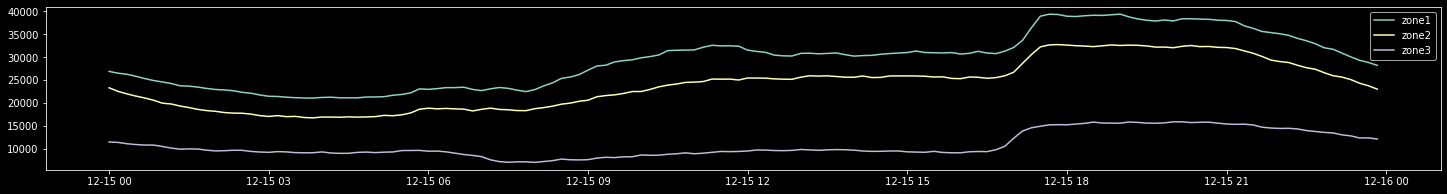

In [ ]:
# ▶ 저녁 시간에 전력 소비량이 많음
plt.plot(df_8['DateTime'], df_8['zone1'], label='zone1')
plt.plot(df_8['DateTime'], df_8['zone2'], label='zone2')
plt.plot(df_8['DateTime'], df_8['zone3'], label='zone3')
plt.legend()
plt.gcf().set_size_inches(25, 3)

## **🥈Session 2**  
**┗ 전력 소비량과 기상 데이터 상관관계 분석**  
---

### · Line plot - 상관관계 분석
---
* 전력 소비량과 기상 데이터를 Plotting 후 관계 파악


In [ ]:
df.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


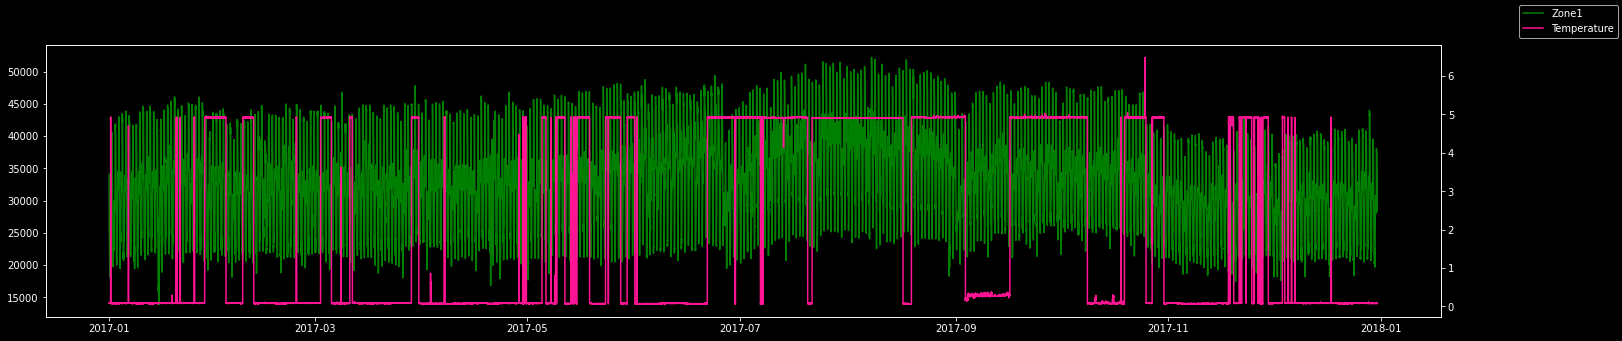

In [ ]:
# ▶ twin plot(이중 축 차트)
# ▶ 온도가 증가할 수록 소비량도 증가하는 경향을 보임
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['zone1'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['Wind Speed'], color='deeppink', label='Temperature')

fig.legend()
plt.gcf().set_size_inches(25, 5)
plt.show()


### · Scatter plot - 상관관계 분석

```
|r| = 절대값  

· 0.0 <= |r| < 0.2 : 상관관계가 없다. = 선형의 관계가 없다.  

· 0.2 <= |r| < 0.4 : 약한 상관관계가 있다.  

· 0.4 <= |r| < 0.6 : 보통의 상관관계가 있다.  

· 0.6 <= |r| < 0.8 : 강한 (높은) 상관관계가 있다.  

· 0.8 <= |r| <= 1.0 : 매우 강한 (매우 높은) 상관관계가 있다.
```





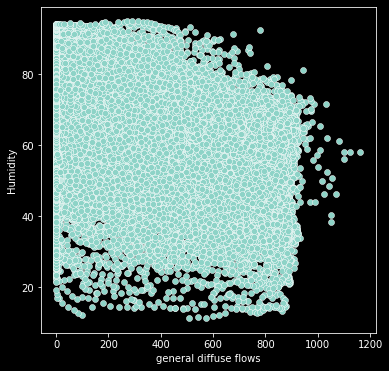

In [ ]:
# ▶ Scatter plot
# ▶ 온도가 증가할 수록 소비량도 증가하는 경향을 보임
sns.scatterplot(x=df['general diffuse flows'], y=df['Humidity']);
plt.gcf().set_size_inches(6, 6)

In [ ]:
# ▶ 상관계수 확인
import scipy.stats as stats
stats.pearsonr(x=df['general diffuse flows'], y=df['Humidity'])

(-0.46813800353388646, 0.0)

### · Pair plot - 상관관계 분석
---



In [ ]:
df.columns

Index(['DateTime', 'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3',
       'hour'],
      dtype='object')

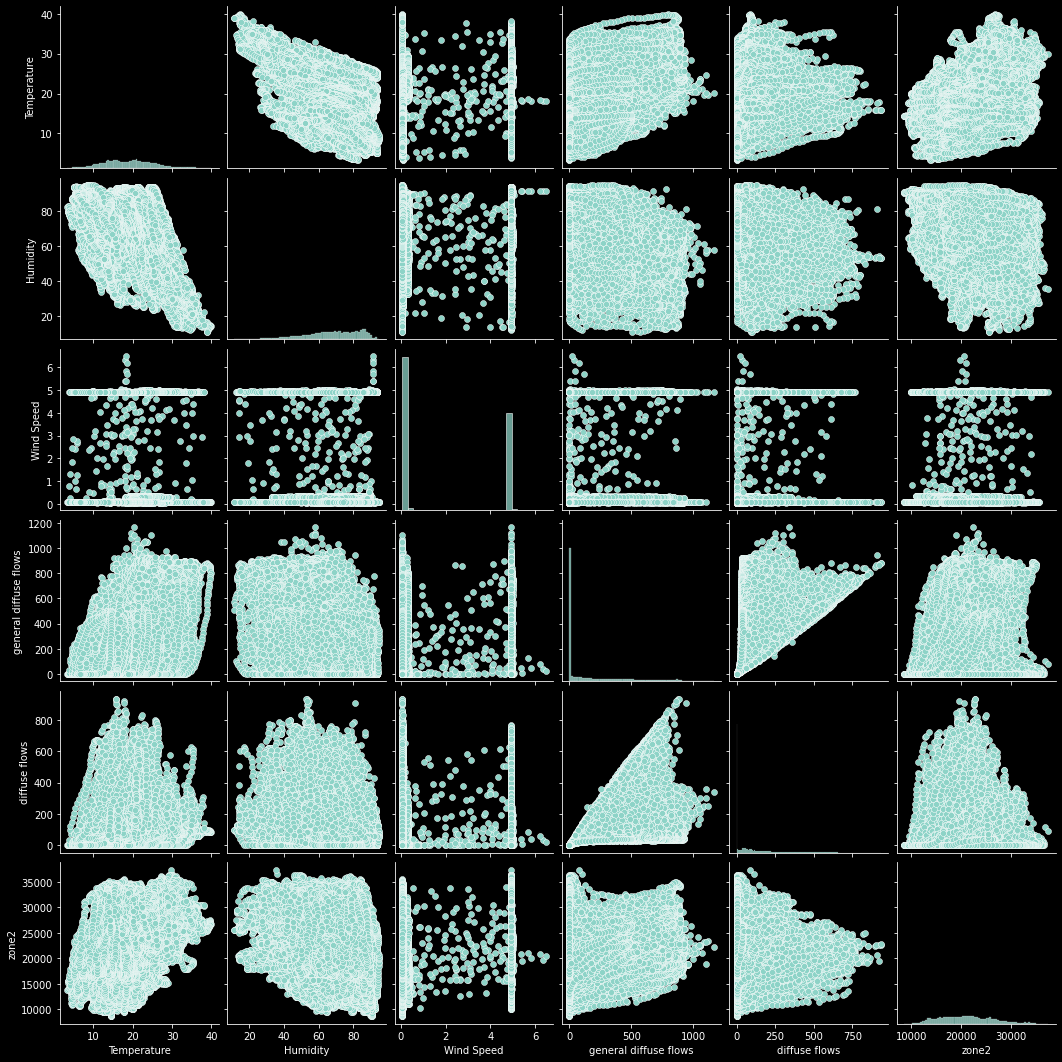

In [ ]:
# ▶ 모든 변수 조합에 관한 Scatter plot
df_pair = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'zone2']]
# plt.style.use(['dark_background'])
sns.pairplot(df_pair)
plt.show()

### · Heat map - 상관관계 분석
---



In [ ]:
df_pair.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone2
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.382428
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.294961
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.146413
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.157223
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.044667
zone2,0.382428,-0.294961,0.146413,0.157223,0.044667,1.000000


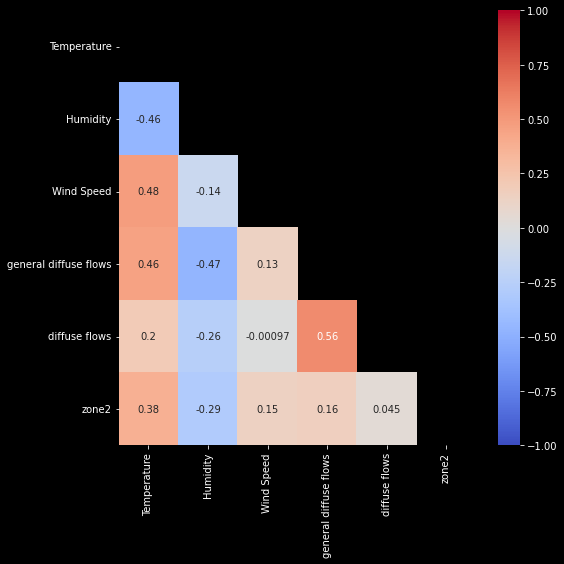

In [ ]:
# ▶ 변수의 모든 조합, 상관계수 표현
plt.gcf().set_size_inches(8, 8)
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = np.triu(np.ones_like(df_pair.corr())));

## **🥇Session 3**  
**┗ 이상 탐지 모델링**  
---


### · Model Selection
---
* Isoaltion Forest

  * 장단점
```
  # [good] 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적음 (※ Sampling 사용 Tree 생성)
  # [good] Anomaly Detection 성능 우수 (※ Robust)
  # [good] Train data에 이상치가 포함되지 않아도 잘 동작함
  # [bad] 분리를 위한 선을 수직과 수평으로만 자르기 때문에 잘못된 scoring이 발생할 수 있음 (※ 대안책 Extended Isolation Forest)
```


* RRCF(Robust Random Cut Forest)
  * 장단점
```
  # [good] 분포가 변화하는 Streaming data에 유리함
  # [good] Batch 및 Streaming data 모두 활용 가능
  # [good] Subsampling을 통한 연산량 감소
  # [good] 보이지 않던 희귀 값 (Activity when usually none)
  # [bad] 분리를 위한 선을 수직과 수평으로만 자르기 때문에 잘못된 scoring이 발생할 수 있음
```

In [ ]:
df.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


In [ ]:
# ▶ Col 위치 변경
df = df[['DateTime', 'month', 'hour', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3']]
df.head()

,DateTime,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,0,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### · 데이터 준비
---

In [ ]:
# ▶ 사전 col drop
X_train = df.drop(['DateTime', 'zone1', 'zone2', 'zone3'], axis=1)
X_train.head()

,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,1,0,6.559,73.8,0.083,0.051,0.119
1,1,0,6.414,74.5,0.083,0.070,0.085
2,1,0,6.313,74.5,0.080,0.062,0.100
3,1,0,6.121,75.0,0.083,0.091,0.096
4,1,0,5.921,75.7,0.081,0.048,0.085


### · Isolation Forest Train & Test
---

In [ ]:
from sklearn.ensemble import IsolationForest
# ▶ Model 학습 및 예측
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=100, contamination = 0.20, random_state=42)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)

In [ ]:
y_pred_train[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# ▶ 1,0 으로 abnormal data 변경
y_pred_train = np.where(y_pred_train==-1, 1, 0)
y_pred_train[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
# ▶ abnormal data concat
df['abnormal'] = y_pred_train
df.head()

,DateTime,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,abnormal
0,2017-01-01 00:00:00,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,0,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


In [ ]:
df['abnormal'].value_counts()

0    41933
1    10483
Name: abnormal, dtype: int64

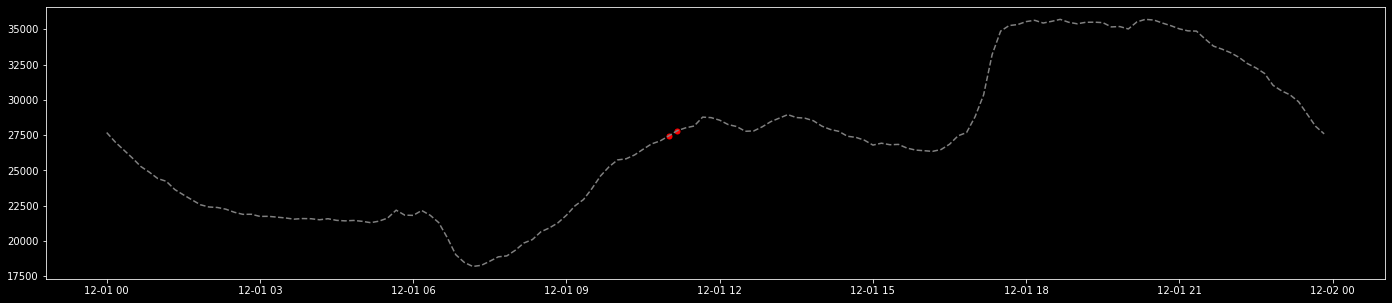

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone1)
df_split = df[df['DateTime'].astype(str).str.contains('2017-12-01')]
#df_split = df[df['DateTime'].astype(str).str.contains('2017-08')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal']==1]['DateTime'], df_split[df_split['abnormal']==1]['zone1'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone1'], linestyle='--', color='grey');

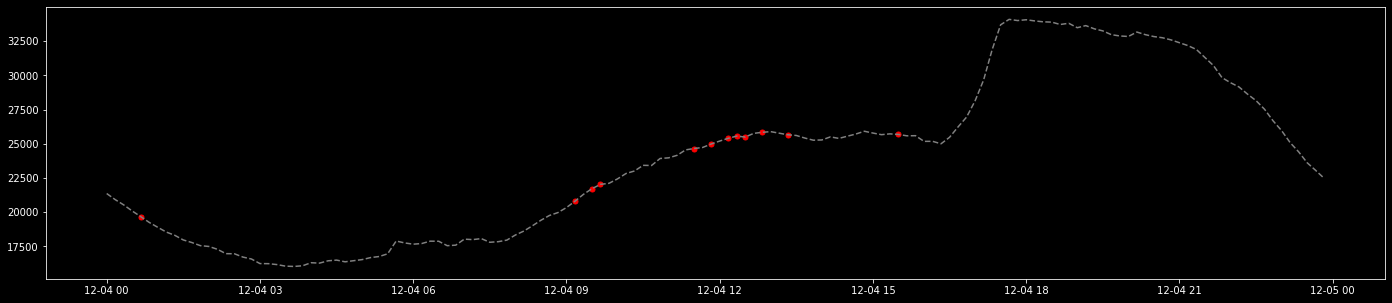

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone2)
df_split = df[df['DateTime'].astype(str).str.contains('2017-12-04')]
#df_split = df[df['DateTime'].astype(str).str.contains('2017-12')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal']==1]['DateTime'], df_split[df_split['abnormal']==1]['zone2'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone2'], linestyle='--', color='grey');

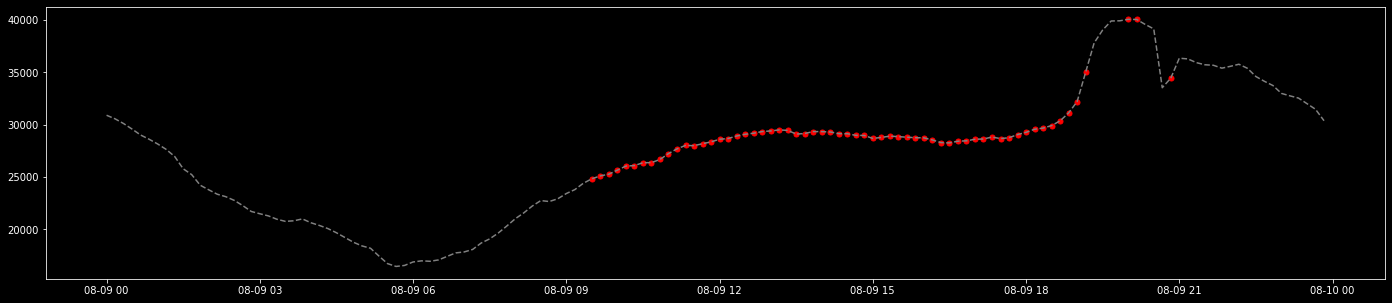

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone3)
df_split = df[df['DateTime'].astype(str).str.contains('2017-08-09')]
#df_split = df[df['DateTime'].astype(str).str.contains('2017-08')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal']==1]['DateTime'], df_split[df_split['abnormal']==1]['zone3'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone3'], linestyle='--', color='grey');

### · RRCF Train & Test
---

In [ ]:
# ▶ Data 준비
X_train = df.drop(['DateTime', 'zone1', 'zone2', 'zone3', 'abnormal'], axis=1)
X_train.head()

,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,1,0,6.559,73.8,0.083,0.051,0.119
1,1,0,6.414,74.5,0.083,0.070,0.085
2,1,0,6.313,74.5,0.080,0.062,0.100
3,1,0,6.121,75.0,0.083,0.091,0.096
4,1,0,5.921,75.7,0.081,0.048,0.085


In [ ]:
# ▶ rrcf 설치
!pip install rrcf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.3-py3-none-any.whl size=9810 sha256=6a41d31cd89881f4d24793c14b4c7319d8347c83b064d9e70b9bb93da407f7cf
  Stored in directory: /root/.cache/pip/wheels/38/d5/8c/e5d10c99f3cd7b02453fdb4323dabf1d319203f7f1f2281a4a
Successfully built rrcf


In [ ]:
# ▶ (1) Batch Detection

import numpy as np
import pandas as pd
import rrcf

# ▶ Set parameters

np.random.seed(0)
n = X_train.shape[0]
X = X_train.values # 중요 point
num_trees = 100
tree_size = 256

# ▶ Construct forest
forest = []
while len(forest) < num_trees:
    # ▶ Select random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size),
                           replace=False)
    # ▶ Add sampled trees to forest
    trees = [rrcf.RCTree(X[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)

# ▶ Compute average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index

In [ ]:
avg_codisp[0:5]

0    30.0
1     4.0
2     2.0
3     4.0
4     6.0
dtype: float64

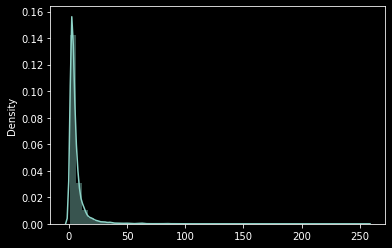

In [ ]:
# ▶ Anomaly Score 분포 확인
sns.distplot(avg_codisp);

In [ ]:
# ▶ Anomaly Score concat
df['avg_codisp'] = avg_codisp
df.head()

,DateTime,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,abnormal,avg_codisp
0,2017-01-01 00:00:00,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,30.0
1,2017-01-01 00:10:00,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,4.0
2,2017-01-01 00:20:00,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,2.0
3,2017-01-01 00:30:00,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,4.0
4,2017-01-01 00:40:00,1,0,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6.0


In [ ]:
# ▶ Anomaly Score Lableing
df['abnormal2'] = np.where(df['avg_codisp']>20, 1, 0)
df.head()

,DateTime,month,hour,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,abnormal,avg_codisp,abnormal2
0,2017-01-01 00:00:00,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,30.0,1
1,2017-01-01 00:10:00,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,4.0,0
2,2017-01-01 00:20:00,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,2.0,0
3,2017-01-01 00:30:00,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,4.0,0
4,2017-01-01 00:40:00,1,0,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6.0,0


In [ ]:
df['abnormal2'].value_counts()

0    50004
1     2412
Name: abnormal2, dtype: int64

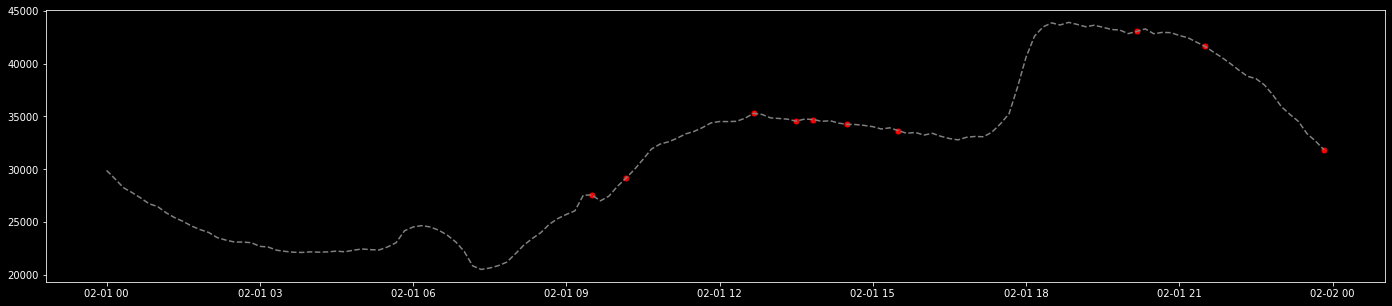

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone1)
df_split = df[df['DateTime'].astype(str).str.contains('2017-02-01')]
#df_split = df[df['DateTime'].astype(str).str.contains('2017-08')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal2']==1]['DateTime'], df_split[df_split['abnormal2']==1]['zone1'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone1'], linestyle='--', color='grey');

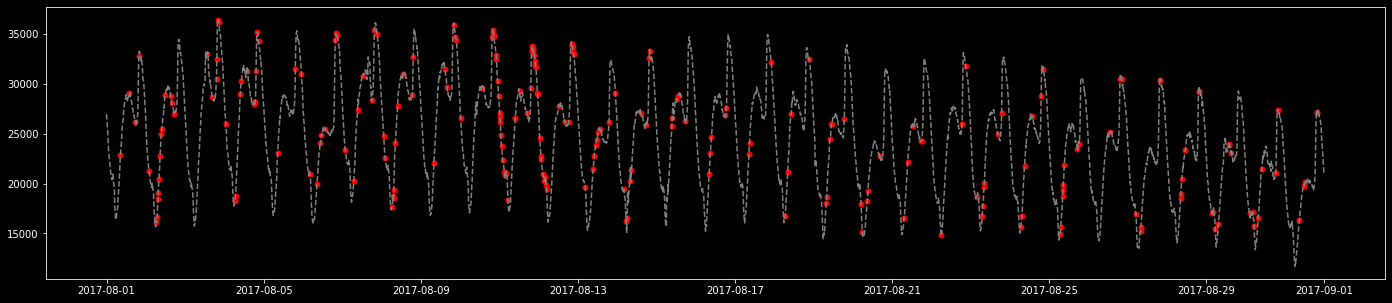

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone2)
#df_split = df[df['DateTime'].astype(str).str.contains('2017-08-01')]
df_split = df[df['DateTime'].astype(str).str.contains('2017-08')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal2']==1]['DateTime'], df_split[df_split['abnormal2']==1]['zone2'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone2'], linestyle='--', color='grey');

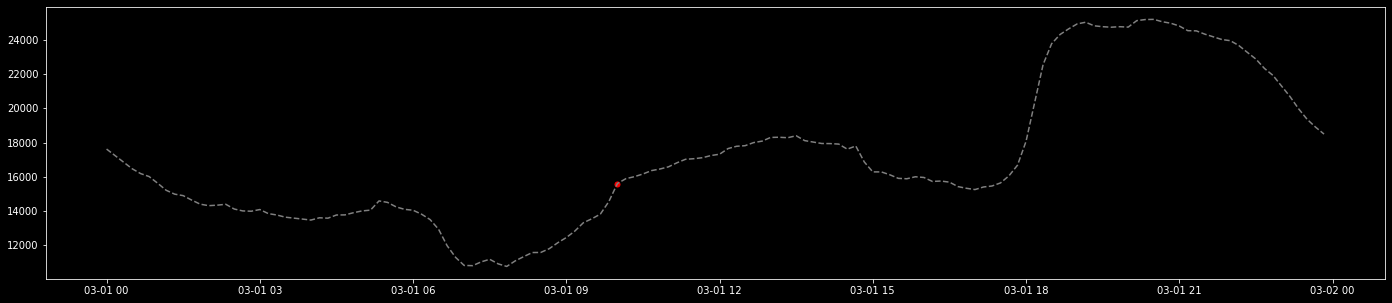

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone3)
df_split = df[df['DateTime'].astype(str).str.contains('2017-03-01')]
#df_split = df[df['DateTime'].astype(str).str.contains('2017-08')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal2']==1]['DateTime'], df_split[df_split['abnormal2']==1]['zone3'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone3'], linestyle='--', color='grey');

Text(0.5, 1.0, 'log(CoDisp)')

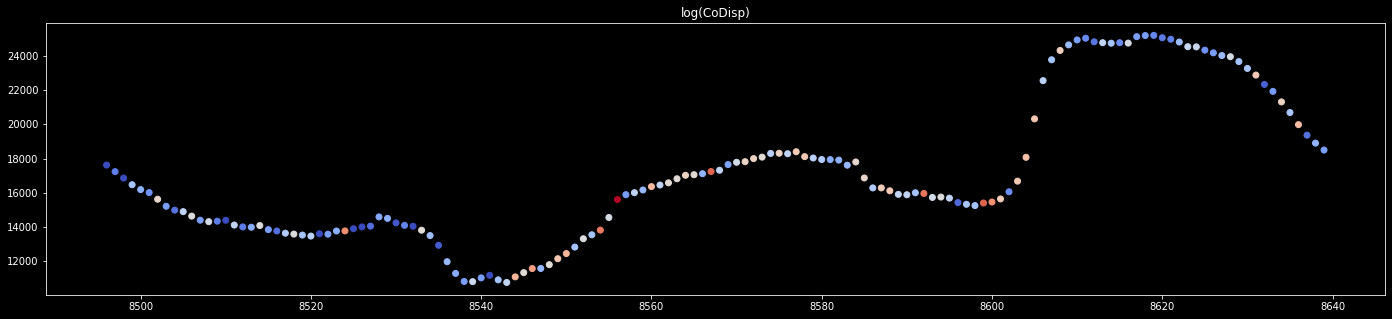

In [ ]:
# ▶ 조기 탐지 가능 여부 확인(zone3), colormap 적용

df_split = df[df['DateTime'].astype(str).str.contains('2017-03-01')]
#df_split = df[df['DateTime'].astype(str).str.contains('2017-08')]

plt.figure(figsize=(24,5))
plt.scatter(df_split.index, df_split['zone3'],c=np.log(df_split.avg_codisp.sort_index().values),cmap='coolwarm')
plt.title('log(CoDisp)')

### · Model Comparison
---

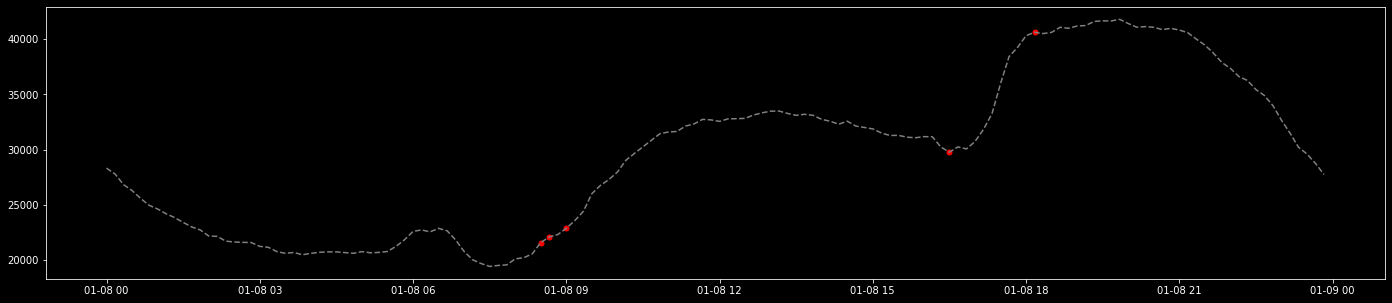

In [ ]:
# ▶ 모델 비교
df_split = df[df['DateTime'].astype(str).str.contains('2017-01-08')]

plt.figure(figsize=(24,5))
plt.plot(df_split[df_split['abnormal']==1]['DateTime'], df_split[df_split['abnormal']==1]['zone1'], 'o', color='green', markersize=5);
plt.plot(df_split[df_split['abnormal2']==1]['DateTime'], df_split[df_split['abnormal2']==1]['zone1'], 'o', color='red', markersize=5);
plt.plot(df_split['DateTime'], df_split['zone1'], linestyle='--', color='grey');